## MultiClassification Documentation 

This notebook demostrates how to use `skexplain` for multiclassification problems. Multiclassification problems are a mode of classification where the output can be more than 2 classes. This is not to be confused with multioutput algorithms that produce more a single output. `skexplain` handles multiclassification in a simple way that the class to be evaluated is used as an input argument and then the user can iterate over the different classes. 

In [1]:
# Create a multiclassification model from the Iris dataset in Sklearn. 
import sys, os 
sys.path.insert(0, os.path.dirname(os.getcwd()))

import skexplain 
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
import numpy as np
import shap 

X,y = load_iris(return_X_y=True, as_frame=True)
lr = LogisticRegression().fit(X,y)

### MultiClass Permutation Importance 

In this example, we will compute the permutation importance using the ranked probability skill score (RPSS; a higher dimensional version of the Brier skill score). Scoring strategy is set to `minimize` since lower the RPSS would indicate an important feature. `rpss` is a built-in evaluation function, but you can also you a custom function. Check out the documentation on the Permutation Importance. 

In [2]:
explainer = skexplain.ExplainToolkit(('LogisticRegression', lr), X=X, y=y,)

### MultiClass ALE 

In this example, we will compute the ALE curve for a given feature and demostrate how that feature contributes to each class. 

### MultiClass SHAP 

In this example, we show case how to show SHAP for a single class. 

In [3]:
np.unique(y)

array([0, 1, 2])

In [4]:
results = []
for class_idx in np.unique(y):
    shap_kws={'masker' : shap.maskers.Partition(X, max_samples=10, clustering="correlation"), 
           'algorithm' : 'permutation', 'class_idx' : class_idx}

    results.append( explainer.local_attributions(method='shap', 
                                       shap_kws=shap_kws,
                                          )
                  )

Permutation explainer: 151it [00:11,  1.96it/s]                                                                                                       


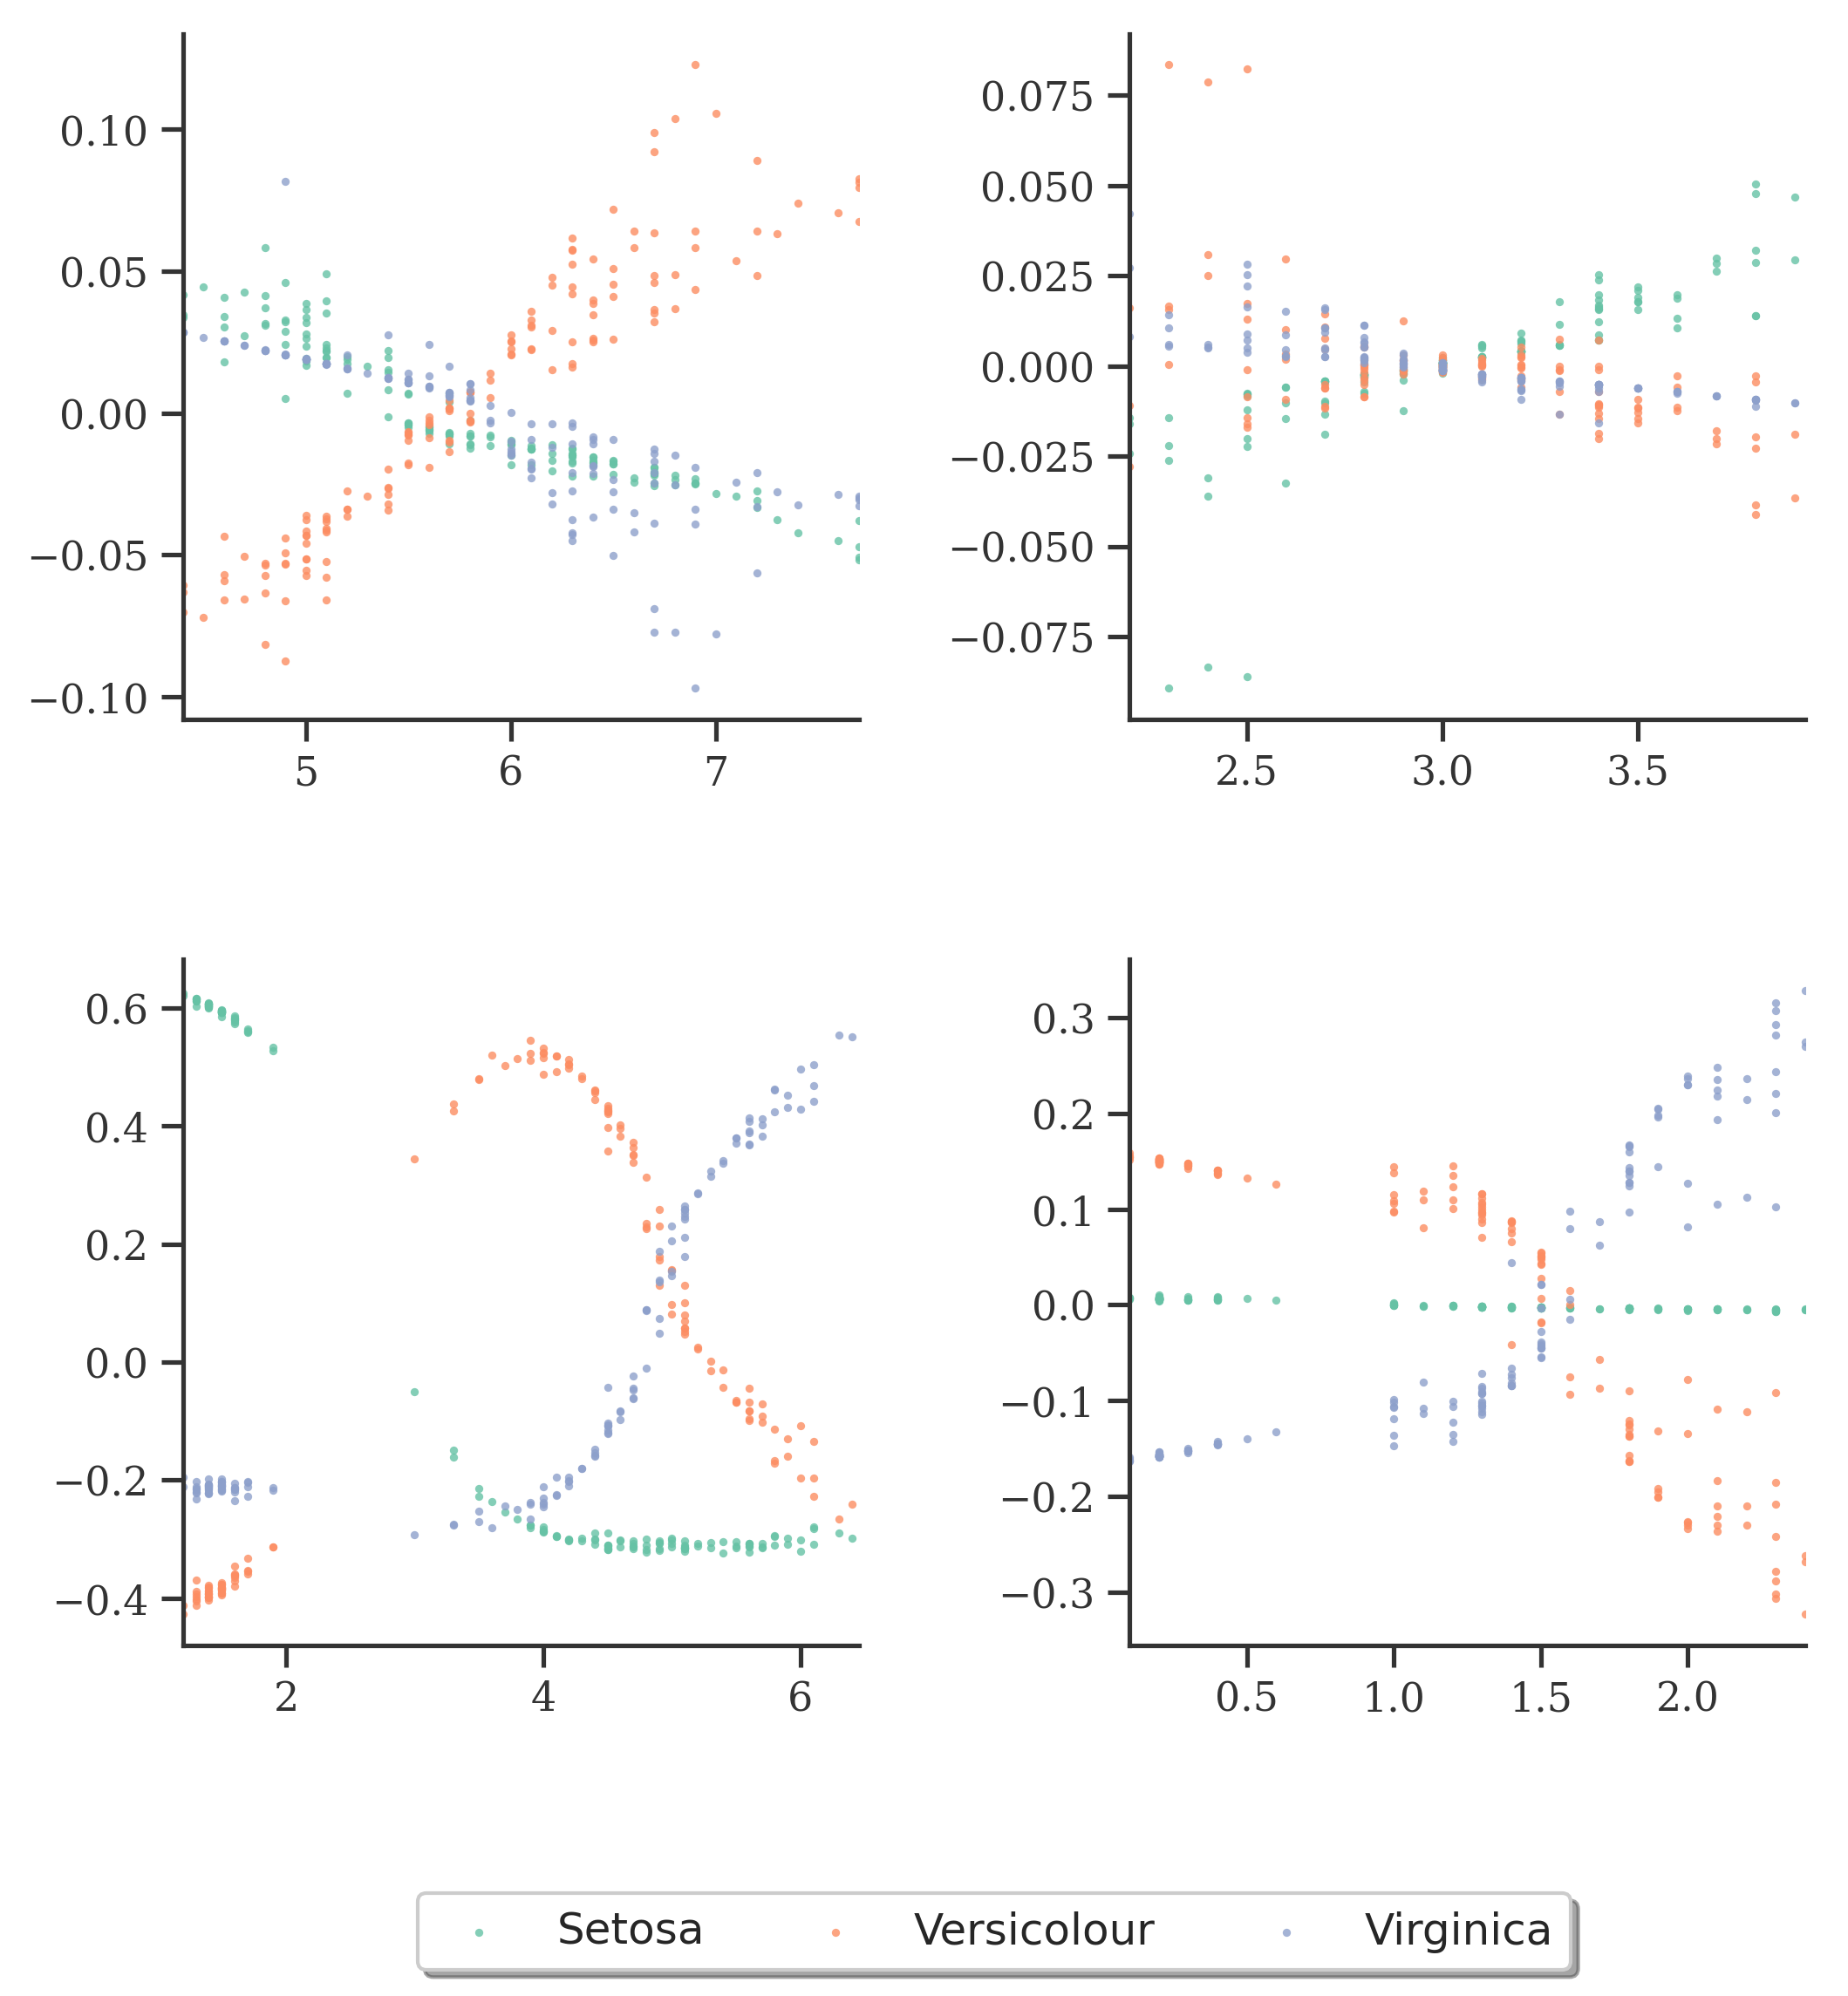

In [11]:
from skexplain.plot.base_plotting import PlotStructure
import seaborn as sns

features = X.columns
n_panels=len(features)
plotter= PlotStructure(BASE_FONT_SIZE = 16)
fig, axes = plotter.create_subplots(n_panels=len(features), n_columns=2, figsize=(8,8), dpi=300, 
                                      wspace=0.4, hspace=0.35)

colors = list(sns.color_palette("Set2"))
for ax, feature in zip(axes.flat, features):
    for i, shap_vals in enumerate(results): 
        explainer.scatter_plot(features=[feature],
                    plot_type = 'dependence',
                    dataset=shap_vals,
                    method = ['shap'], 
                    estimator_name = 'LogisticRegression',
                    color = colors[i],
                    interaction_index=None, 
                    ax=ax, 
     )
        
        
# Add legend 
plotter.set_legend(n_panels, fig, ax, labels=['Setosa', 'Versicolour', 'Virginica'])